<a href="https://colab.research.google.com/github/benhutchins25/benhutchins25/blob/main/Replicating_Velders_et_al_2007_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

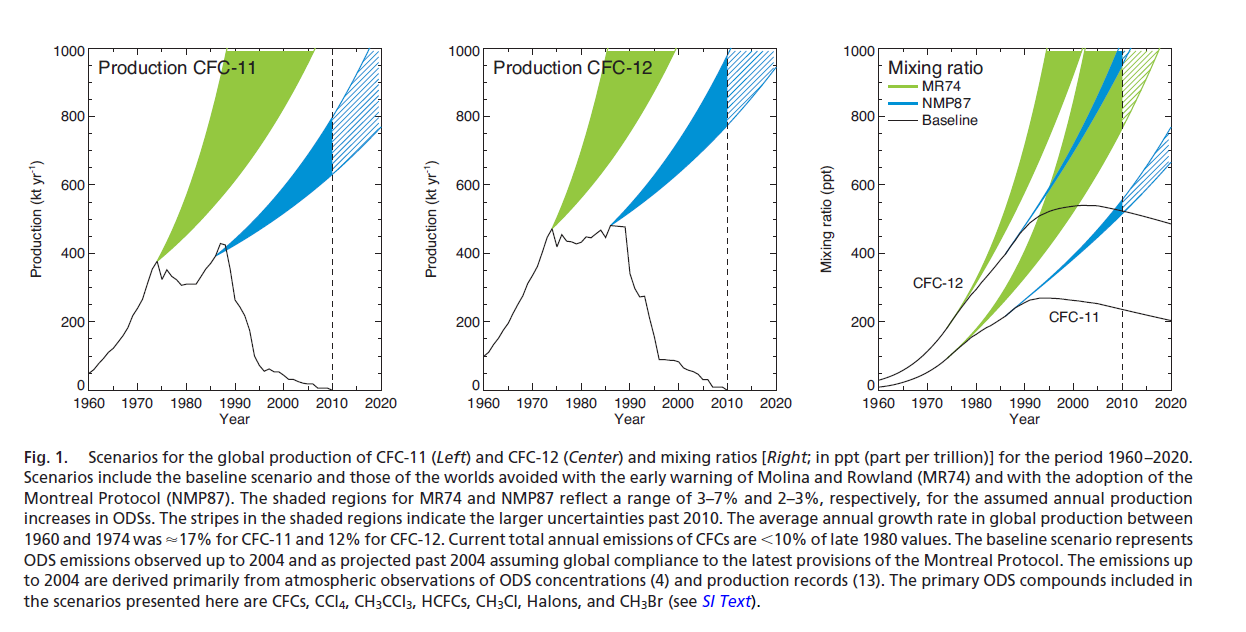

First plot - year (1960-2020) x-axis, production of CFC-11 (kt yr-1) y-axis

Second plot -  year (1960-2020) x-axis, production of CFC-12 (kt yr-1) y-axis

Third plot - year (1960-2020) x-axis, mixing ratio (ppt) of CFC-11 and CFC-12 y-axis

Steps



1.   Generate dataset with measurements pre-1987 and then projections (2% increase, 2.5% increase, 3% increase) going forwards
2.   Plot these against the year
3. Try this for 1974
4. Also try to get range








In [1]:
# import modules

%matplotlib inline

import numpy as np # import numpy for maths
from matplotlib import pyplot as plt # import matplotlib for graphs
plt.style.use('seaborn-darkgrid') # set up the grid background for the figures
plt.rcParams['figure.figsize'] = (16, 9) # specify the size of the graphs

In [2]:
pip install fair # install the Finite Amplitude Impulse-Response simple climate-carbon-cycle model

     |████████████████████████████████| 3.4 MB 5.1 MB/s 


In [3]:
import fair # import the fair model

In [4]:
from fair.forward import fair_scm # import the different RCP scenarios from the fair module

In [5]:
# Weight Halon and Fluoro (ODS) gases by radiative efficiency

from fair.constants import radeff # qunatifies the radiative efficiency of substances - specifically the minor GHGs

#print(radeff.aslist) # returns theb radiative efficiency of all 31 GHG species as a list
#np.shape(radeff.aslist)

# to generate plots with these you have to import the basic RCP runs first

# get RCP modules
from fair.RCPs import rcp26, rcp45, rcp60, rcp85

# generate the basic RCP runs in terms of carbon, forcing, and temperature changes

C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions) # C = co2 concentrations (ppm), F = radiative forcing (W m^-2), T = temperature (K)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions) # imports the co2 concentrations, radiative forcing and temperature changes associated with RCP6
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions) # generates emissions based on the RCP6 projections
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

#print(C60[:,3:15])
#print(C60[:,0])

#print(np.shape(C60))  nt - refers to the number of years from around 1776-2500

# indices 3:15 are HFCs and PFCs
C26_hfc134a_eq = np.sum(C26[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A # for each of the HFCs and PFCs (and for each RCP run) the emissions for each are multiplied by the radiative efficiency, this is then divided by the radiative efficiency of HFC134a
C45_hfc134a_eq = np.sum(C45[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A # 'axis makes sure that the '3:15' of C45[:, 3:15] is used rather than the :
C60_hfc134a_eq = np.sum(C60[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A
C85_hfc134a_eq = np.sum(C85[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A

#help(np.sum)

# indices 15:31 are ozone depleters
C26_cfc12_eq = np.sum(C26[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12 # for each of the ozone depleters (CFCs - montreal protocol gases)
C45_cfc12_eq = np.sum(C45[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12 # (and for each RCP run) the emissions for each are multiplied by the radiative efficiency, this is then divided by the radiative efficiency of CFC12
C60_cfc12_eq = np.sum(C60[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12
C85_cfc12_eq = np.sum(C85[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12


This list of 31 gases have a defined Radeff (radiative efficiency value)

Index 3 (CF4) through 15 (SF6) are all HFC (or similar) species that are compared with the radiative efficiency of HFC134a

Index 15 (CFC11) through 31 (CH3Cl) are all CFC/halon species that are compared with the radiative efficiency of CFC12

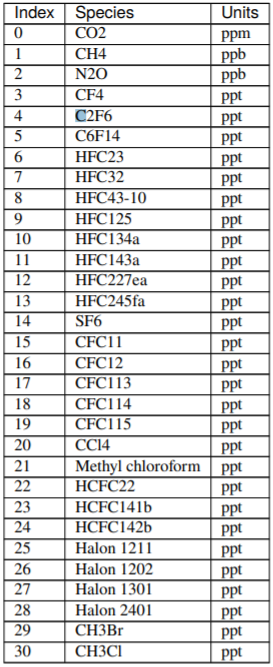

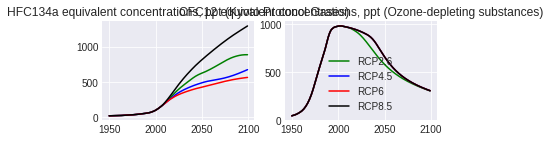

In [6]:
# generate plots for HFC134a and CFC12 equivalent concentrations

fig = plt.figure() # set up the subplot structurte
plt.rcParams['figure.figsize'] = (24, 13)
ax1 = fig.add_subplot(221) # establish the positions of each of the graphs within the subplot thing
ax2 = fig.add_subplot(222)

ax1.plot(rcp26.Emissions.year[185:335], C26_hfc134a_eq[185:335], color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for HFC134a gases for RCP2.6 (x-axis)
ax1.plot(rcp45.Emissions.year[185:335], C45_hfc134a_eq[185:335], color='blue', label='RCP4.5')
ax1.plot(rcp60.Emissions.year[185:335], C60_hfc134a_eq[185:335], color='red', label='RCP6')
ax1.plot(rcp85.Emissions.year[185:335], C85_hfc134a_eq[185:335], color='black', label='RCP8.5')
ax1.set_title("HFC134a equivalent concentrations, ppt (Kyoto Protocol Gases)")

ax2.plot(rcp26.Emissions.year[185:335], C26_cfc12_eq[185:335], color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax2.plot(rcp45.Emissions.year[185:335], C45_cfc12_eq[185:335], color='blue', label='RCP4.5') # data constrained from 1950 to 2100
ax2.plot(rcp60.Emissions.year[185:335], C60_cfc12_eq[185:335], color='red', label='RCP6')
ax2.plot(rcp85.Emissions.year[185:335], C85_cfc12_eq[185:335], color='black', label='RCP8.5')
ax2.set_title("CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax2.legend();



In [7]:
#print(rcp26.Emissions.year)
np.shape(rcp26.Emissions.year)

# 'nt' is the year from 1765 to 2500

(736,)

In [8]:
# constrain data from 1950 to 1987
# from 1987 onwards, concentrations increase by 3% each year

#print(rcp26.Emissions.year[185:223]) # constrained range from 1950 to 1987)
#print(rcp26.Emissions.year[222]) # the year 1987
#print(C26_cfc12_eq[222])   # equivalent concentrations of CFC12 in 1987 (ppt)

years=list(range(1988,2051)) # generate an list for the years 

years_array=np.array(years)

#RCP 2.6

world_avd_26_3=C26_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_26_3_series=[] # empty list for world avoided
world_avd_26_3_series.append(world_avd_26_3) # appending the first vlaue to the list

world_avd_26_2=C26_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_26_2_series=[] # empty list for world avoided
world_avd_26_2_series.append(world_avd_26_2) # appending the first vlaue to the list

# RCP 4.5

world_avd_45_3=C45_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_45_3_series=[] # empty list for world avoided
world_avd_45_3_series.append(world_avd_45_3) # appending the first vlaue to the list

world_avd_45_2=C45_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_45_2_series=[] # empty list for world avoided
world_avd_45_2_series.append(world_avd_45_2) # appending the first vlaue to the list

# RCP 6.0

world_avd_60_3=C60_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_60_3_series=[] # empty list for world avoided
world_avd_60_3_series.append(world_avd_60_3) # appending the first vlaue to the list

world_avd_60_2=C60_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_60_2_series=[] # empty list for world avoided
world_avd_60_2_series.append(world_avd_60_2) # appending the first vlaue to the list

# RCP 8.5

world_avd_85_3=C85_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_85_3_series=[] # empty list for world avoided
world_avd_85_3_series.append(world_avd_85_3) # appending the first vlaue to the list

world_avd_85_2=C85_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_85_2_series=[] # empty list for world avoided
world_avd_85_2_series.append(world_avd_85_2) # appending the first vlaue to the list



# RCP 2.6

for x in range(0,years_array.size):
  world_avd_26_3=world_avd_26_3*1.03
  world_avd_26_3_series.append(world_avd_26_3)

for x in range(0,years_array.size):
  world_avd_26_2=world_avd_26_2*1.02
  world_avd_26_2_series.append(world_avd_26_2)

# RCP 4.5

for x in range(0,years_array.size):
  world_avd_45_3=world_avd_45_3*1.03
  world_avd_45_3_series.append(world_avd_45_3)

for x in range(0,years_array.size):
  world_avd_45_2=world_avd_45_2*1.02
  world_avd_45_2_series.append(world_avd_45_2)

# RCP 6.0

for x in range(0,years_array.size):
  world_avd_60_3=world_avd_60_3*1.03
  world_avd_60_3_series.append(world_avd_60_3)

for x in range(0,years_array.size):
  world_avd_60_2=world_avd_60_2*1.02
  world_avd_60_2_series.append(world_avd_60_2)

# RCP 8.5

for x in range(0,years_array.size):
  world_avd_85_3=world_avd_85_3*1.03
  world_avd_85_3_series.append(world_avd_85_3)

for x in range(0,years_array.size):
  world_avd_85_2=world_avd_85_2*1.02
  world_avd_85_2_series.append(world_avd_85_2)



print(world_avd_26_3_series)
print(world_avd_26_2_series)

print(world_avd_45_3_series)
print(world_avd_45_2_series)

print(world_avd_60_3_series)
print(world_avd_60_2_series)

print(world_avd_85_3_series)
print(world_avd_85_2_series)

[783.8765119608286, 807.3928073196535, 831.6145915392431, 856.5630292854204, 882.259920163983, 908.7277177689025, 935.9895493019696, 964.0692357810287, 992.9913128544596, 1022.7810522400933, 1053.4644838072961, 1085.068418321515, 1117.6204708711605, 1151.1490849972954, 1185.6835575472144, 1221.2540642736308, 1257.8916862018398, 1295.628436787895, 1334.4972898915319, 1374.5322085882779, 1415.7681748459263, 1458.241220091304, 1501.9884566940432, 1547.0481103948646, 1593.4595537067105, 1641.2633403179118, 1690.5012405274492, 1741.2162777432727, 1793.452766075571, 1847.2563490578382, 1902.6740395295733, 1959.7542607154605, 2018.5468885369244, 2079.103295193032, 2141.476394048823, 2205.7206858702875, 2271.892306446396, 2340.049075639788, 2410.250547908982, 2482.5580643462513, 2557.034806276639, 2633.745850464938, 2712.7582259788865, 2794.140972758253, 2877.965201941001, 2964.304157999231, 3053.233282739208, 3144.830281221384, 3239.175189658026, 3336.3504453477667, 3436.4409587082, 3539.5341

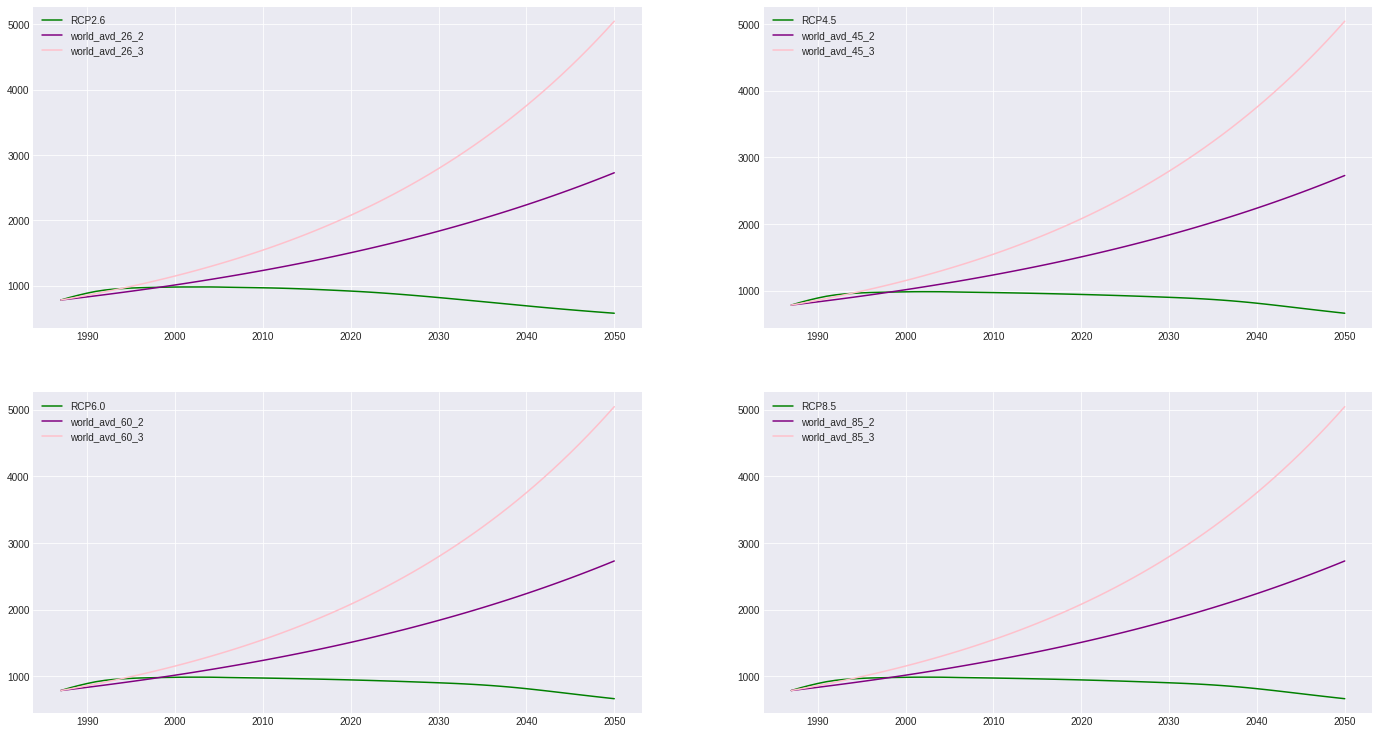

In [9]:
fig = plt.figure() # set up the subplot structurte
plt.rcParams['figure.figsize'] = (24, 13)
ax1 = fig.add_subplot(221) # establish the positions of each of the graphs within the subplot thing
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp26.Emissions.year[222:286], C26_cfc12_eq[222:286], color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax1.plot(rcp26.Emissions.year[222:286],world_avd_26_2_series,color='purple',label='world_avd_26_2')
ax1.plot(rcp26.Emissions.year[222:286],world_avd_26_3_series,color='pink',label='world_avd_26_3')
#ax1.title("RCP2.6 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax1.legend();

ax2.plot(rcp26.Emissions.year[222:286], C45_cfc12_eq[222:286], color='green', label='RCP4.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax2.plot(rcp26.Emissions.year[222:286],world_avd_45_2_series,color='purple',label='world_avd_45_2')
ax2.plot(rcp26.Emissions.year[222:286],world_avd_45_3_series,color='pink',label='world_avd_45_3')
#ax2.title("RCP4.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax2.legend();

ax3.plot(rcp26.Emissions.year[222:286], C60_cfc12_eq[222:286], color='green', label='RCP6.0') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax3.plot(rcp26.Emissions.year[222:286],world_avd_60_2_series,color='purple',label='world_avd_60_2')
ax3.plot(rcp26.Emissions.year[222:286],world_avd_60_3_series,color='pink',label='world_avd_60_3')
#ax3.title("RCP6.0 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax3.legend();

ax4.plot(rcp26.Emissions.year[222:286], C85_cfc12_eq[222:286], color='green', label='RCP8.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax4.plot(rcp26.Emissions.year[222:286],world_avd_85_2_series,color='purple',label='world_avd_85_2')
ax4.plot(rcp26.Emissions.year[222:286],world_avd_85_3_series,color='pink',label='world_avd_85_3')
#ax4.title("RCP8.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax4.legend();

In [10]:
#print(C26_cfc12_eq[222:286])
#print(C45_cfc12_eq[222:286])
#print(C60_cfc12_eq[222:286])
#print(C85_cfc12_eq[222:286])

# appears that there is only difference within this time periods between RCP 2.6 and the rest (2.6 is only outlier)

In [11]:
# concatenate the datasets

# 1960 to 1977

print(rcp26.Emissions.year[195:257])

#print(np.shape(rcp26.Emissions.year[195:286]))
#print(rcp26.Emissions.year[195:286])

# pree-montreal data from 1960 to 1986

pre_montreal_26=C26_cfc12_eq[195:221]
pre_montreal_45=C45_cfc12_eq[195:221]
pre_montreal_60=C60_cfc12_eq[195:221]
pre_montreal_85=C85_cfc12_eq[195:221]

# concateante arrays to generate data from 1960 to 2021

world_proj_26=np.concatenate([pre_montreal_26,C26_cfc12_eq[222:257]])
world_proj_45=np.concatenate([pre_montreal_45,C45_cfc12_eq[222:257]])
world_proj_60=np.concatenate([pre_montreal_60,C60_cfc12_eq[222:257]])
world_proj_85=np.concatenate([pre_montreal_85,C85_cfc12_eq[222:257]])

# ben u sausage

world_avd_rcp26_2=np.concatenate([pre_montreal_26,world_avd_26_2_series])
world_avd_rcp45_2=np.concatenate([pre_montreal_45,world_avd_45_2_series])
world_avd_rcp60_2=np.concatenate([pre_montreal_60,world_avd_60_2_series])
world_avd_rcp85_2=np.concatenate([pre_montreal_85,world_avd_85_2_series])

world_avd_rcp26_3=np.concatenate([pre_montreal_26,world_avd_26_3_series])
world_avd_rcp45_3=np.concatenate([pre_montreal_45,world_avd_45_3_series])
world_avd_rcp60_3=np.concatenate([pre_montreal_60,world_avd_60_3_series])
world_avd_rcp85_3=np.concatenate([pre_montreal_85,world_avd_85_3_series])

#print(np.shape(world_proj_26))
#print(np.shape(world_proj_45))
#print(np.shape(world_proj_60))
#print(np.shape(world_proj_85))

print(C26_cfc12_eq[221])
print(C85_cfc12_eq[221])

years_2=list(range(1960,2021)) # generate a years thing

years_array_2=np.array(years_2)

[1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021.]
744.7219850060495
744.7219850060495


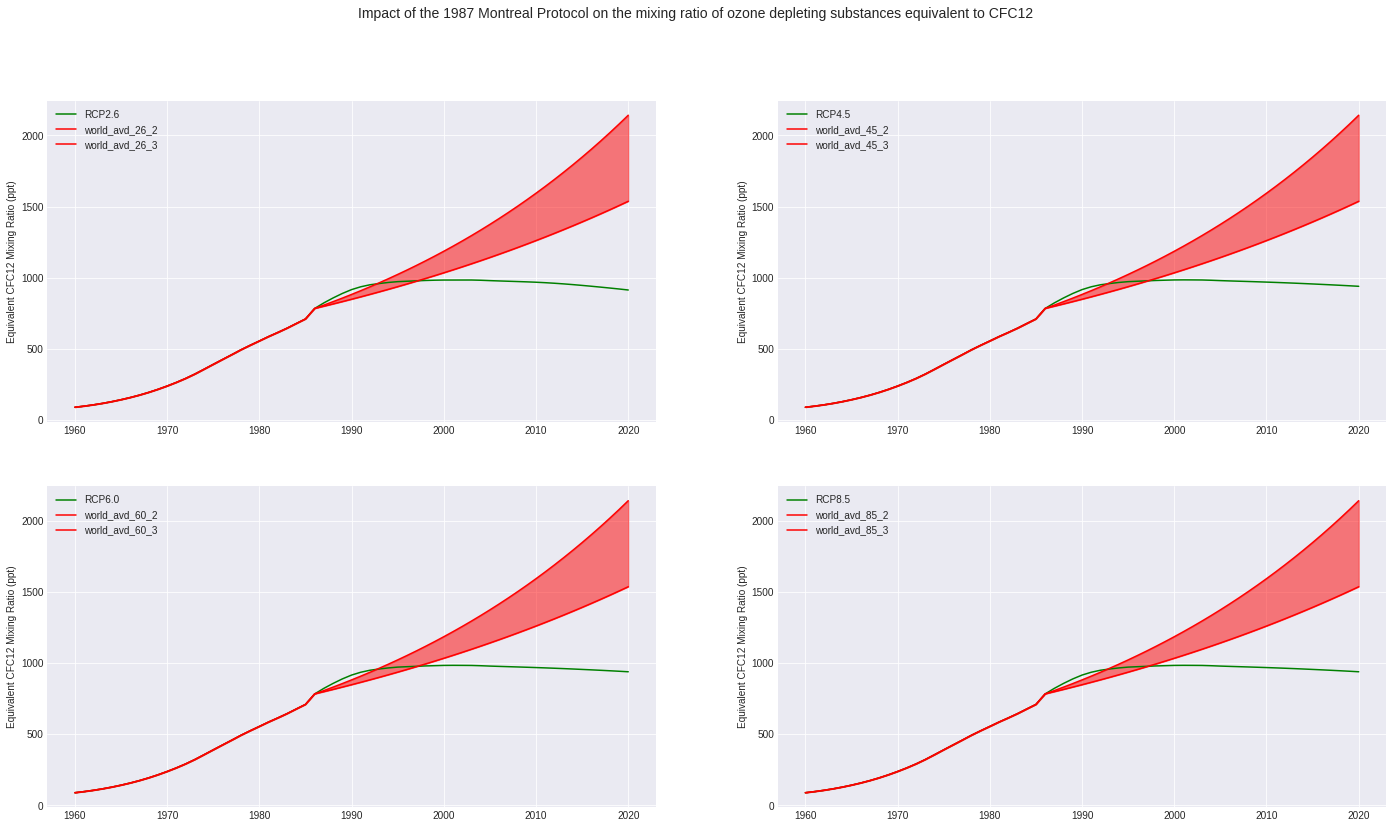

In [12]:
fig = plt.figure() # set up the subplot structurte
plt.rcParams['figure.figsize'] = (24, 13)
plt.suptitle("Impact of the 1987 Montreal Protocol on the mixing ratio of ozone depleting substances equivalent to CFC12",size=14)
ax1 = fig.add_subplot(221) # establish the positions of each of the graphs within the subplot thing
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(years_array_2, world_proj_26, color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax1.plot(years_array_2,world_avd_rcp26_2[:-29],color='red',label='world_avd_26_2')
ax1.plot(years_array_2,world_avd_rcp26_3[:-29],color='red',label='world_avd_26_3')
ax1.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax1.fill_between(years_array_2,world_avd_rcp26_2[:-29],world_avd_rcp26_3[:-29],color='red', alpha=.5)
#ax1.title("RCP2.6 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax1.legend();

ax2.plot(years_array_2, world_proj_45, color='green', label='RCP4.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax2.plot(years_array_2,world_avd_rcp45_2[:-29],color='red',label='world_avd_45_2')
ax2.plot(years_array_2,world_avd_rcp45_3[:-29],color='red',label='world_avd_45_3')
ax2.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax2.fill_between(years_array_2,world_avd_rcp45_2[:-29],world_avd_rcp45_3[:-29],color='red', alpha=.5)
#ax2.title("RCP4.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax2.legend();

ax3.plot(years_array_2, world_proj_60, color='green', label='RCP6.0') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax3.plot(years_array_2,world_avd_rcp60_2[:-29],color='red',label='world_avd_60_2')
ax3.plot(years_array_2,world_avd_rcp60_3[:-29],color='red',label='world_avd_60_3')
ax3.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax3.fill_between(years_array_2,world_avd_rcp60_2[:-29],world_avd_rcp60_3[:-29],color='red', alpha=.5)
#ax3.title("RCP6.0 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax3.legend();

ax4.plot(years_array_2, world_proj_85, color='green', label='RCP8.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax4.plot(years_array_2,world_avd_rcp85_2[:-29],color='red',label='world_avd_85_2')
ax4.plot(years_array_2,world_avd_rcp85_3[:-29],color='red',label='world_avd_85_3')
ax4.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax4.fill_between(years_array_2,world_avd_rcp85_2[:-29],world_avd_rcp85_3[:-29],color='red', alpha=.5)
#ax4.title("RCP8.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax4.legend();

For each of the RCPs (which I'm pretty sure make no significant difference as the values are based on measurements lol).

These plots show the world avoided projection based on Velders et a;. 2007 for the continued increase in substances that have an equivalent depleting potential to CFC12. At 1987, the world projected, or in this case the world in reality, the two worlds split: without the montreal protocol ODS would have likely increased between 2-3% each year.

In [13]:
# now try and do the same plot, but from 1960 to 2100
# then use these values to calculate radiative forcing (look at the difference between RCP projections for world projected vs world avoided)

# establish the years array for the same time period

years_3=list(range(1960,2099)) # generate a years thing

years_array_3=np.array(years_3)

# generate the projections going forwards from 1988 to 2100

years=list(range(1988,2100)) # generate an list for the years projections from 1988 to 2100

years_array=np.array(years)

#RCP 2.6

world_avd_26_3=C26_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_26_3_series=[] # empty list for world avoided
world_avd_26_3_series.append(world_avd_26_3) # appending the first vlaue to the list

world_avd_26_2=C26_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_26_2_series=[] # empty list for world avoided
world_avd_26_2_series.append(world_avd_26_2) # appending the first vlaue to the list

# RCP 4.5

world_avd_45_3=C45_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_45_3_series=[] # empty list for world avoided
world_avd_45_3_series.append(world_avd_45_3) # appending the first vlaue to the list

world_avd_45_2=C45_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_45_2_series=[] # empty list for world avoided
world_avd_45_2_series.append(world_avd_45_2) # appending the first vlaue to the list

# RCP 6.0

world_avd_60_3=C60_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_60_3_series=[] # empty list for world avoided
world_avd_60_3_series.append(world_avd_60_3) # appending the first vlaue to the list

world_avd_60_2=C60_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_60_2_series=[] # empty list for world avoided
world_avd_60_2_series.append(world_avd_60_2) # appending the first vlaue to the list

# RCP 8.5

world_avd_85_3=C85_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_85_3_series=[] # empty list for world avoided
world_avd_85_3_series.append(world_avd_85_3) # appending the first vlaue to the list

world_avd_85_2=C85_cfc12_eq[222] # concentration of CFC12 equivalent ppt to use as 1987 value baseline thing
world_avd_85_2_series=[] # empty list for world avoided
world_avd_85_2_series.append(world_avd_85_2) # appending the first vlaue to the list

# RCP 2.6

for x in range(0,years_array.size):
  world_avd_26_3=world_avd_26_3*1.03
  world_avd_26_3_series.append(world_avd_26_3)

for x in range(0,years_array.size):
  world_avd_26_2=world_avd_26_2*1.02
  world_avd_26_2_series.append(world_avd_26_2)

# RCP 4.5

for x in range(0,years_array.size):
  world_avd_45_3=world_avd_45_3*1.03
  world_avd_45_3_series.append(world_avd_45_3)

for x in range(0,years_array.size):
  world_avd_45_2=world_avd_45_2*1.02
  world_avd_45_2_series.append(world_avd_45_2)

# RCP 6.0

for x in range(0,years_array.size):
  world_avd_60_3=world_avd_60_3*1.03
  world_avd_60_3_series.append(world_avd_60_3)

for x in range(0,years_array.size):
  world_avd_60_2=world_avd_60_2*1.02
  world_avd_60_2_series.append(world_avd_60_2)

# RCP 8.5

for x in range(0,years_array.size):
  world_avd_85_3=world_avd_85_3*1.03
  world_avd_85_3_series.append(world_avd_85_3)

for x in range(0,years_array.size):
  world_avd_85_2=world_avd_85_2*1.02
  world_avd_85_2_series.append(world_avd_85_2)

  # pree-montreal data from 1960 to 1986

pre_montreal_26=C26_cfc12_eq[195:221]
pre_montreal_45=C45_cfc12_eq[195:221]
pre_montreal_60=C60_cfc12_eq[195:221]
pre_montreal_85=C85_cfc12_eq[195:221]

# concatenate the observations with the world avoided projections
# observations + 2/3% increase

# for a 2% increase

world_avd_rcp26_2=np.concatenate([pre_montreal_26,world_avd_26_2_series])
world_avd_rcp45_2=np.concatenate([pre_montreal_45,world_avd_45_2_series])
world_avd_rcp60_2=np.concatenate([pre_montreal_60,world_avd_60_2_series])
world_avd_rcp85_2=np.concatenate([pre_montreal_85,world_avd_85_2_series])

# for a 3% increase

world_avd_rcp26_3=np.concatenate([pre_montreal_26,world_avd_26_3_series])
world_avd_rcp45_3=np.concatenate([pre_montreal_45,world_avd_45_3_series])
world_avd_rcp60_3=np.concatenate([pre_montreal_60,world_avd_60_3_series])
world_avd_rcp85_3=np.concatenate([pre_montreal_85,world_avd_85_3_series])

In [14]:
print(rcp26.Emissions.year[195:336]) # years from 1960 to 2100

[1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029. 2030. 2031.
 2032. 2033. 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041. 2042. 2043.
 2044. 2045. 2046. 2047. 2048. 2049. 2050. 2051. 2052. 2053. 2054. 2055.
 2056. 2057. 2058. 2059. 2060. 2061. 2062. 2063. 2064. 2065. 2066. 2067.
 2068. 2069. 2070. 2071. 2072. 2073. 2074. 2075. 2076. 2077. 2078. 2079.
 2080. 2081. 2082. 2083. 2084. 2085. 2086. 2087. 2088. 2089. 2090. 2091.
 2092. 2093. 2094. 2095. 2096. 2097. 2098. 2099. 2100.]


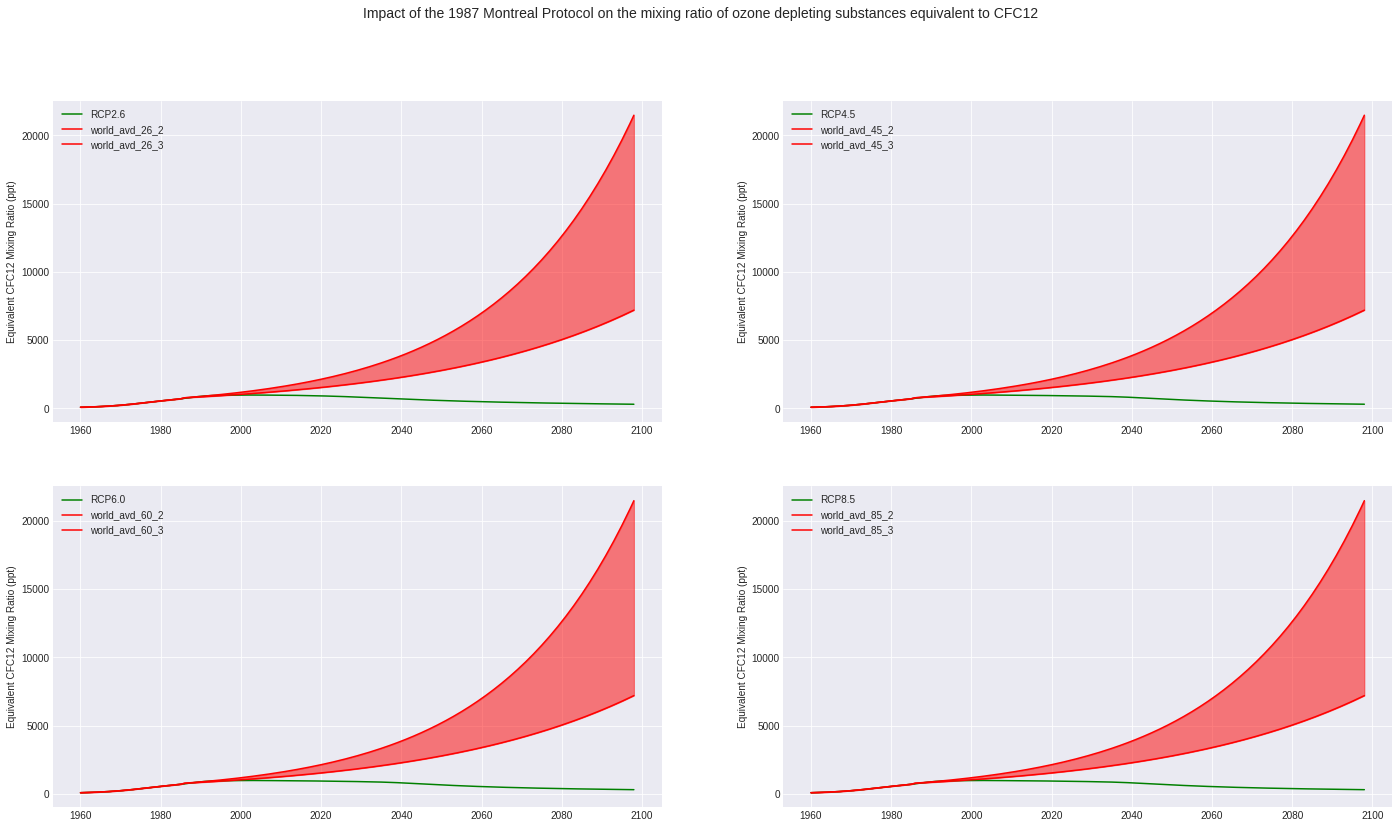

In [15]:
# now generate the plots for the 2100 projections

fig = plt.figure() # set up the subplot structurte
plt.rcParams['figure.figsize'] = (24, 13)
plt.suptitle("Impact of the 1987 Montreal Protocol on the mixing ratio of ozone depleting substances equivalent to CFC12",size=14)
ax1 = fig.add_subplot(221) # establish the positions of each of the graphs within the subplot thing
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(years_array_3, C26_cfc12_eq[195:334], color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax1.plot(years_array_3,world_avd_rcp26_2,color='red',label='world_avd_26_2')
ax1.plot(years_array_3,world_avd_rcp26_3,color='red',label='world_avd_26_3')
ax1.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax1.fill_between(years_array_3,world_avd_rcp26_2,world_avd_rcp26_3,color='red', alpha=.5)
#ax1.title("RCP2.6 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax1.legend();

ax2.plot(years_array_3, C45_cfc12_eq[195:334], color='green', label='RCP4.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax2.plot(years_array_3,world_avd_rcp45_2,color='red',label='world_avd_45_2')
ax2.plot(years_array_3,world_avd_rcp45_3,color='red',label='world_avd_45_3')
ax2.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax2.fill_between(years_array_3,world_avd_rcp45_2,world_avd_rcp45_3,color='red', alpha=.5)
#ax2.title("RCP4.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax2.legend();

ax3.plot(years_array_3, C60_cfc12_eq[195:334], color='green', label='RCP6.0') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax3.plot(years_array_3,world_avd_rcp60_2,color='red',label='world_avd_60_2')
ax3.plot(years_array_3,world_avd_rcp60_3,color='red',label='world_avd_60_3')
ax3.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax3.fill_between(years_array_3,world_avd_rcp60_2,world_avd_rcp60_3,color='red', alpha=.5)
#ax3.title("RCP6.0 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax3.legend();

ax4.plot(years_array_3, C85_cfc12_eq[195:334], color='green', label='RCP8.5') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax4.plot(years_array_3,world_avd_rcp85_2,color='red',label='world_avd_85_2')
ax4.plot(years_array_3,world_avd_rcp85_3,color='red',label='world_avd_85_3')
ax4.set_ylabel('Equivalent CFC12 Mixing Ratio (ppt)')
ax4.fill_between(years_array_3,world_avd_rcp85_2,world_avd_rcp85_3,color='red', alpha=.5)
#ax4.title("RCP8.5 CFC12 equivalent concentrations, ppt (Ozone-depleting substances)")
ax4.legend();

In [23]:
# now try to account for this with radiative forcing plots?!

# try this for RCP2.6 first

print(world_avd_rcp26_2[26])
print(years_array_3[27])

years_array_3a=years_array_3[1:]


print(years_array_3a[26])

# years array 3a and world avoided RCP2.6 2% increase are now in line


783.8765119608286
1987
1987


In [135]:
# now see if you can generate the GHG concerntations with the adapated CFC12 number


#print(C26)

np.shape(C26)

# crop this data to show the concenrtations from 1960 to 2100

#print(rcp26.Emissions.year[195:336]) # years from 1960 to 2100

test=rcp26.Emissions.year[195:336]

#print(test[27])

c26_cfc_range=C26[195:336,:]

#print(c26_cfc_range)
#print(np.shape(c26_cfc_range))

# for CFC12 this is

#print(c26_cfc_range[27,16]) # in ppt

rcp26_cfc12_1987=c26_cfc_range[27,16]

#print(years_array_3)

# find the 1987 emissions of CFC12 to use as a baseline

# now create a projection for this from 1987 oncwards where these concentrations increase by 3% each year

#print(years)

# set up the empty lists for the data from the for loop to go into

world_avd_26_cfc12_3=rcp26_cfc12_1987 # concentration of CFC12 in 1987 ppt to use as 1987 value baseline thing
world_avd_26_cfc12_3_series=[] # empty list for world avoided
world_avd_26_cfc12_3_series.append(world_avd_26_cfc12_3) # appending the first vlaue to the list

# for loop for values from 1988 to 2100

for x in range(0,years_array.size):
 world_avd_26_cfc12_3=world_avd_26_cfc12_3*1.03
 world_avd_26_cfc12_3_series.append(world_avd_26_cfc12_3)



# now concatenate these data

# 1987 - 2100:
print(world_avd_26_cfc12_3_series)

# 1960 to 1977
print(c26_cfc_range[:27,16])


world_avd_26_cfc12_3_concat=np.concatenate([c26_cfc_range[:27,16],world_avd_26_cfc12_3_series])

print(world_avd_26_cfc12_3_concat)

cfc12_26_world_avd=world_avd_26_cfc12_3_concat # better name for the conc. of CFC's from 1960 to 2100

cfc12_26_world_avd_cropped=cfc12_26_world_avd[1:]

print(cfc12_26_world_avd_cropped)

[399.75667455328545, 411.74937478988403, 424.1018560335806, 436.82491171458804, 449.9296590660257, 463.4275488380065, 477.3303753031467, 491.6502865622411, 506.39979515910835, 521.5917890138816, 537.239542684298, 553.356728964827, 569.9574308337718, 587.056153758785, 604.6678383715486, 622.807873522695, 641.4921097283759, 660.7368730202272, 680.5589792108341, 700.9757485871592, 722.0050210447739, 743.6651716761171, 765.9751268264006, 788.9543806311926, 812.6230120501284, 837.0017024116323, 862.1117534839813, 887.9751060885008, 914.6143592711558, 942.0527900492905, 970.3143737507692, 999.4238049632922, 1029.406519112191, 1060.288714685557, 1092.0973761261237, 1124.8602974099074, 1158.6061063322047, 1193.3642895221708, 1229.165218207836, 1266.0401747540711, 1304.0213799966932, 1343.1420213965941, 1383.436282038492, 1424.9393704996469, 1467.6875516146363, 1511.7181781630754, 1557.0697235079676, 1603.7818152132068, 1651.895269669603, 1701.4521277596912, 1752.495691592482, 1805.070562340256

In [72]:
years_4=list(range(1960,2101)) # generate an list for the years 

years_4_array=np.array(years_4)

print(years_4_array)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085
 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099
 2100]


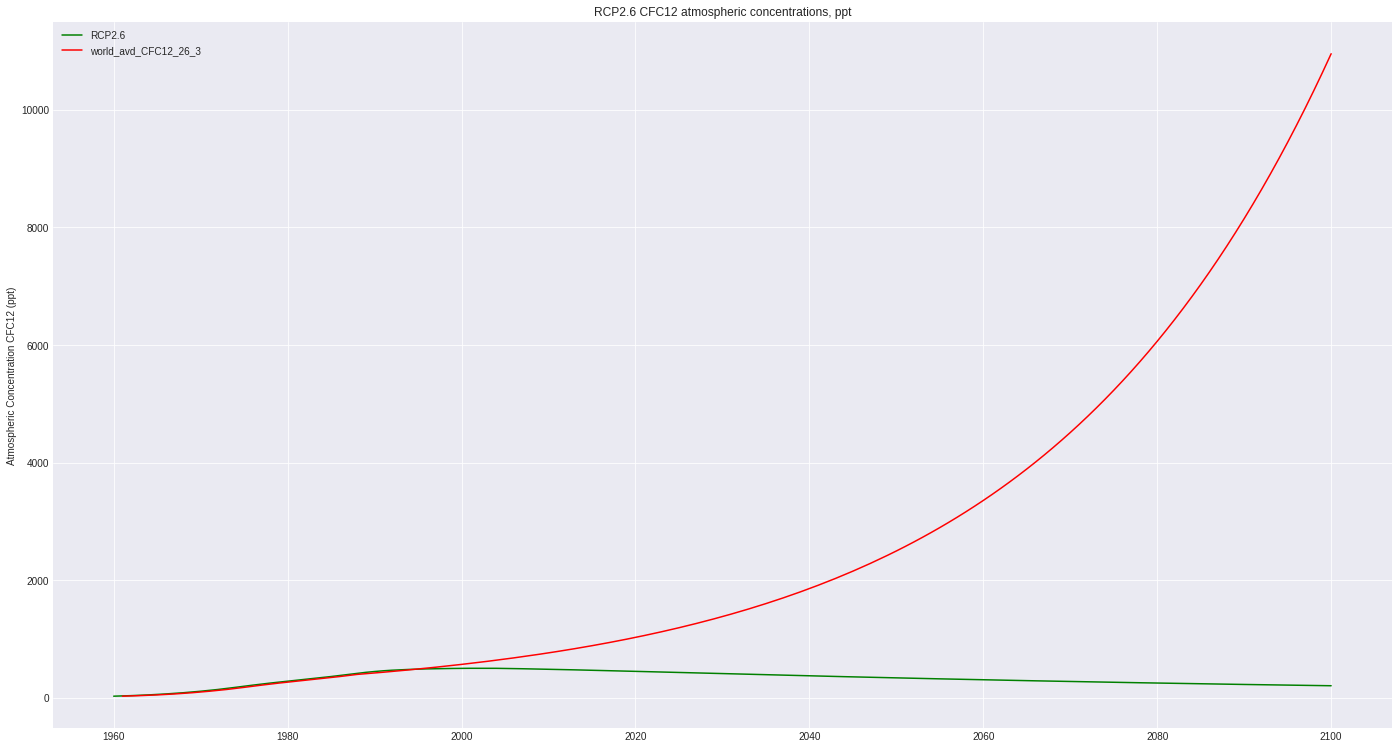

In [80]:
# plot this CFC concentration against the projected concentrations from RCP2.6 as a comparison

plt.plot(years_4_array,c26_cfc_range[:,16] , color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
plt.plot(years_4_array[1:],cfc12_26_world_avd,color='red',label='world_avd_CFC12_26_3')
plt.ylabel('Atmospheric Concentration CFC12 (ppt)')
plt.title("RCP2.6 CFC12 atmospheric concentrations, ppt")
plt.legend();

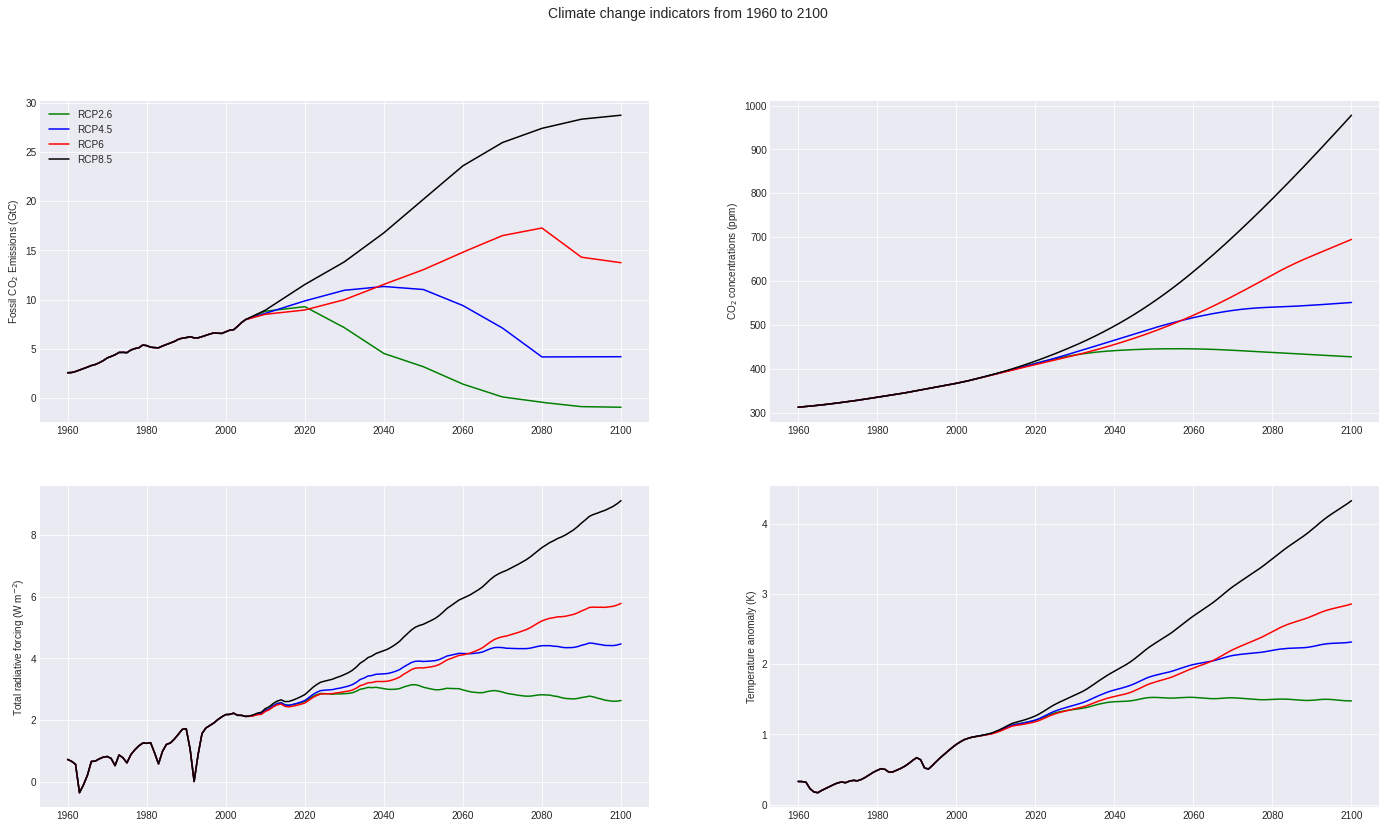

In [85]:
# import the FaIR RCP scenarios
# these are for comparison against - how to modify only the CFC12 concentrtions in this?

# Get RCP modules
from fair.RCPs import rcp26, rcp45, rcp60, rcp85

# Basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

# set up the plost

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
plt.suptitle("Climate change indicators from 1960 to 2100",size="14")

# make sure to set these up with the years from 1960 to 2100

ax1.plot(rcp26.Emissions.year[195:336], rcp26.Emissions.co2_fossil[195:336], color='green', label='RCP2.6')
# just show CO2 conc.
ax2.plot(rcp26.Emissions.year[195:336], C26[195:336, 0], color='green')
# sum over axis 1 to get total ERF
ax3.plot(rcp26.Emissions.year[195:336], np.sum(F26[195:336], axis=1), color='green')
ax4.plot(rcp26.Emissions.year[195:336], T26[195:336], color='green')

ax1.plot(rcp45.Emissions.year[195:336], rcp45.Emissions.co2_fossil[195:336], color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year[195:336], C45[195:336, 0], color='blue')
ax3.plot(rcp45.Emissions.year[195:336], np.sum(F45[195:336], axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[195:336], T45[195:336], color='blue')

ax1.plot(rcp60.Emissions.year[195:336], rcp60.Emissions.co2_fossil[195:336], color='red', label='RCP6')
ax2.plot(rcp60.Emissions.year[195:336], C60[195:336, 0], color='red')
ax3.plot(rcp60.Emissions.year[195:336], np.sum(F60[195:336], axis=1), color='red')
ax4.plot(rcp60.Emissions.year[195:336], T60[195:336], color='red')

ax1.plot(rcp85.Emissions.year[195:336], rcp85.Emissions.co2_fossil[195:336], color='black', label='RCP8.5')
ax2.plot(rcp85.Emissions.year[195:336], C85[195:336, 0], color='black')
ax3.plot(rcp85.Emissions.year[195:336], np.sum(F85[195:336], axis=1), color='black')
ax4.plot(rcp85.Emissions.year[195:336], T85[195:336], color='black')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

(141,)


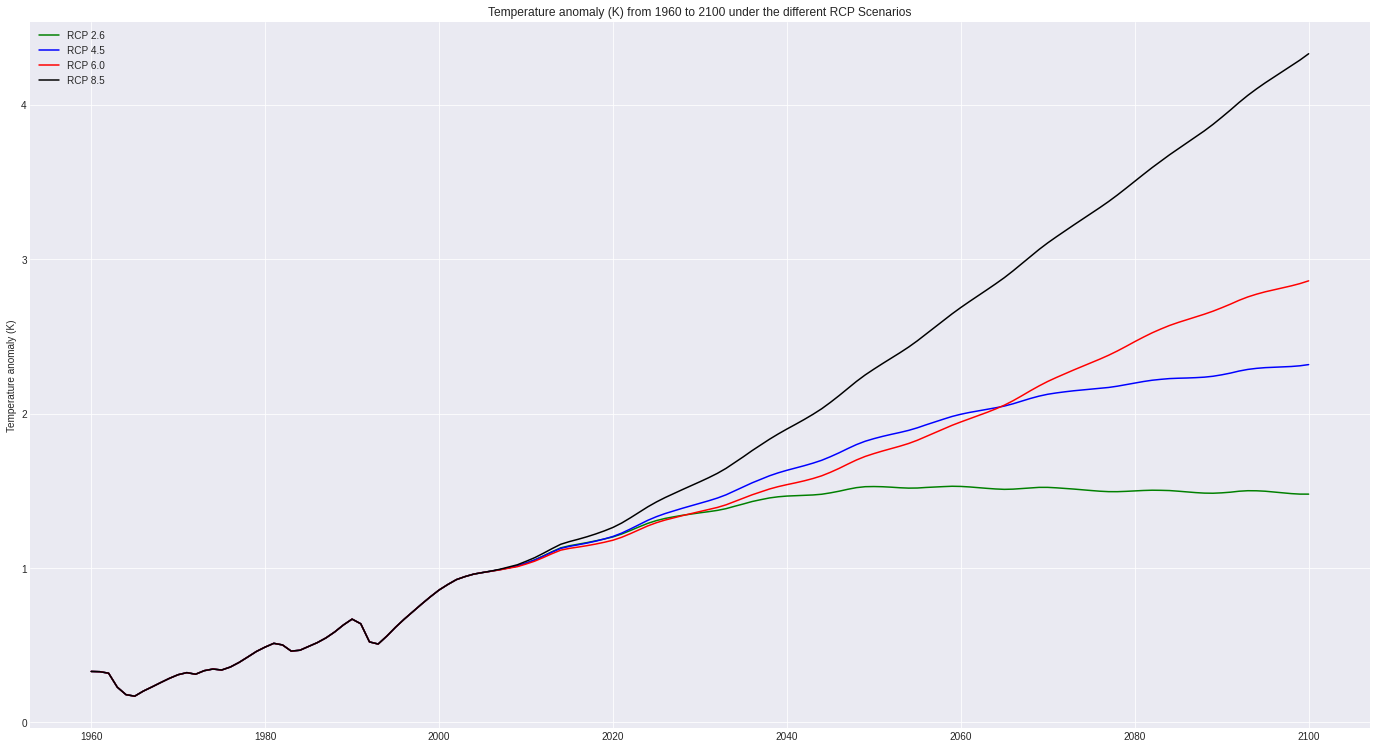

In [117]:
# focus on temp anomaly 

plt.plot(rcp26.Emissions.year[195:336], T26[195:336], color='green',label="RCP 2.6")
plt.plot(rcp45.Emissions.year[195:336], T45[195:336], color='blue',label="RCP 4.5")
plt.plot(rcp60.Emissions.year[195:336], T60[195:336], color='red',label="RCP 6.0")
plt.plot(rcp85.Emissions.year[195:336], T85[195:336], color='black',label="RCP 8.5")
plt.ylabel('Temperature anomaly (K)')
plt.title("Temperature anomaly (K) from 1960 to 2100 under the different RCP Scenarios")
plt.legend();

print(np.shape(rcp26.Emissions.year[195:336]))

[[1.960e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.961e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.962e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.097e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.098e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.099e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


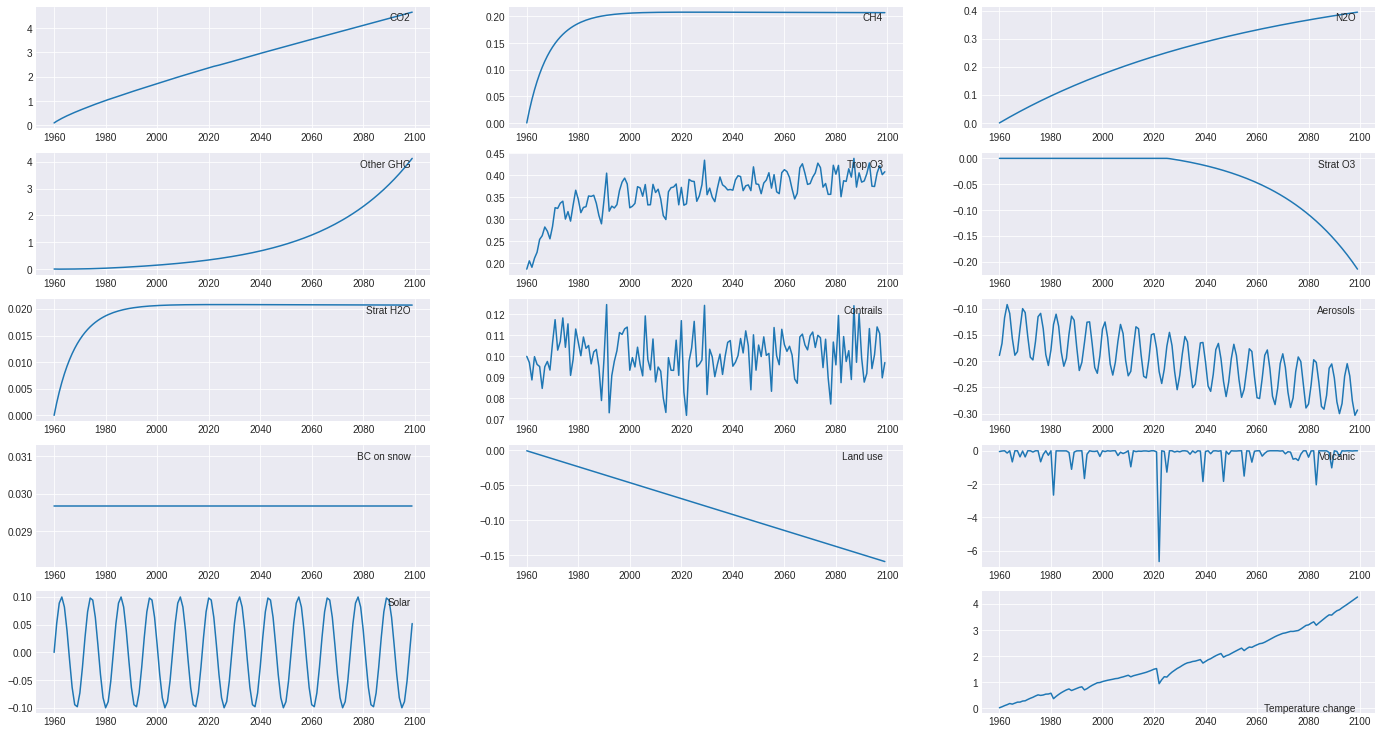

In [167]:
# multi-gas example of using the FaIR model

from scipy.stats import gamma
from scipy.stats import norm
emissions = np.zeros((140,40))

# remember column zero is the years
emissions[:,0] = np.arange(1960,2100)

# add some CO2 fossil and land use, GtC/yr
emissions[:,1] = 10.
emissions[:,2] = 1.

# some methane and nitrous oxide in this example, Mt/yr
emissions[:,3] = 300.
emissions[:,4] = 19.

# aerosol and ozone precursors, Mt/yr
emissions[:,5] = 0.1*np.arange(140) # SOx
emissions[:,6] = 500.*np.log(1+np.arange(140)) # CO
emissions[:,7] = 100.+100.*np.cos(np.arange(140)) # NMVOC
emissions[:,8] = 40*norm.rvs(loc=1, scale=0.1, size=140, random_state=9) # NOx
emissions[:,9] = 6. # BC
emissions[:,10] = 30. # OC
emissions[:,11] = 35. # NH3

# throw in some CFCs
emissions[:,25] = cfc12_26_world_avd # CFC12

# and leave all other emissions as zero.

# Volcanic and solar forcing are provided externally. Let's invent some
solar = 0.1 * np.sin(2 * np.pi * np.arange(140) / 11.5)
volcanic = -gamma.rvs(0.2, size=140, random_state=100)

# efficacies are the temperature change for each forcing agent compared to CO2
# in our runs we usually set the efficacy of BC on snow to 3, following Bond et
# al (2013)
eff = np.ones(13)
eff[9] = 3.0

# b_aero: ERFari for each SLCF species (indices 5 to 11)
# b_tro3: tropospheric ozone coeffs for CH4, CO, NMVOC, NOx

C,F,T = fair_scm(emissions=emissions,
                natural=np.zeros((140,2)), # natural emissions of CH4 and N2O
                aviNOx_frac=0.05, # proportion of NOx emissions from aviation
                fossilCH4_frac=0.25, # proportion of anthro CH4 emis from fossil fuels
                oxCH4_frac=0.61, # proportion of fossil CH4 eventually oxidised to CO2
                stwv_from_ch4=0.1, # proportion of CH4 ERF contributing to strat H2O
                ghg_forcing='Etminan', # etminan or myhre
                tropO3_forcing='Stevenson',
                b_aero = np.array([-35,0,-5,-6,450,-40,-10])*1e-4,
                b_tro3 = np.array([3., 1., 8., 99.])*1e-4,
                aerosol_forcing = 'aerocom+ghan', # aerocom, aerocom+ghan or stevens
                F_solar = solar,
                F_volcanic = volcanic,
                efficacy = eff)

# Plot the forcing from each component
fig = plt.figure()
label = ['CO2','CH4','N2O','Other GHG','Trop O3','Strat O3','Strat H2O','Contrails','Aerosols','BC on snow', 'Land use', 'Volcanic', 'Solar']

for i in range(13):
  ax = fig.add_subplot(5,3,i+1)
  ax.plot(np.arange(1960,2100), F[:,i])
  ax.text(0.95,0.95,label[i],transform=ax.transAxes,va='top', ha='right')

# plot temperature change
ax = fig.add_subplot(5,3,15)
ax.plot(np.arange(1960,2100),T)
ax.text(0.95, 0, 'Temperature change', transform=ax.transAxes, va='bottom', ha='right')

print(emissions)

In [170]:
# duplicate the code from the one above - but now with no input of CFC12 - just how it was originally run

from scipy.stats import gamma

emissions2 = np.zeros((250,40))

# remember column zero is the years

emissions2[:,0] = np.arange(1850,2100)
# add some CO2 fossil and land use, GtC/yr
emissions2[:,1] = 10.
emissions2[:,2] = 1.
# some methane and nitrous oxide in this example, Mt/yr
emissions2[:,3] = 300.
emissions2[:,4] = 19.
# aerosol and ozone precursors, Mt/yr
emissions2[:,5] = 0.1*np.arange(250) # SOx
emissions2[:,6] = 500.*np.log(1+np.arange(250)) # CO
emissions2[:,7] = 100.+100.*np.cos(np.arange(250)) # NMVOC
emissions2[:,8] = 40.*norm.rvs(loc=1, scale=0.1, size=250, random_state=9) # NOx
emissions2[:,9] = 6. # BC
emissions2[:,10] = 30. # OC
emissions2[:,11] = 35. # NH3
# throw in some CFCs
emissions2[:,24] = 1000. # CFC11
# and leave all other emissions2 as zero.

# Volcanic and solar forcing are provided externally. Let's invent some
solar2 = 0.1 * np.sin(2 * np.pi * np.arange(250) / 11.5)
volcanic2 = -gamma.rvs(0.2, size=250, random_state=100)
# efficacies are the temperature change for each forcing agent compared to CO2
# in our runs we usually set the efficacy of BC on snow to 3, following Bond et
# al (2013)
eff2 = np.ones(13)
eff2[9] = 3.0



# b_aero: ERFari for each SLCF species (indices 5 to 11)
# b_tro3: tropospheric ozone coeffs for CH4, CO, NMVOC, NOx
C2,F2,T2 = fair_scm(emissions2=emissions2,
  natural=np.zeros((250,2)), # natural emissions of CH4 and N2O
  aviNOx_frac=0.05, # proportion of NOx emissions from aviation
  fossilCH4_frac=0.25, # proportion of anthro CH4 emis from fossil fuels
  oxCH4_frac=0.61, # proportion of fossil CH4 eventually oxidised to CO2
  stwv_from_ch4=0.1, # proportion of CH4 ERF contributing to strat H2O
  ghg_forcing='Etminan', # etminan or myhre
  tropO3_forcing='Stevenson',
  b_aero = np.array([-35,0,-5,-6,450,-40,-10])*1e-4,
  b_tro3 = np.array([3., 1., 8., 99.])*1e-4,
  aerosol_forcing = 'aerocom+ghan', # aerocom, aerocom+ghan or stevens
  F_solar = solar2,
  F_volcanic = volcanic2,
  efficacy = eff
  )
# Plot the forcing from each component
fig = plt.figure()
label = ['CO2','CH4','N2O','Other GHG','Trop O3','Strat O3','Strat H2O','Contrails','Aerosols',
'BC on snow', 'Land use', 'Volcanic', 'Solar']
for i in range(13):
  ax = fig.add_subplot(5,3,i+1)
  ax.plot(np.arange(1850,2100), F2[:,i])
  ax.text(0.95,0.95,label[i],transform=ax.transAxes,va='top', ha='right')
# plot temperature change
ax = fig.add_subplot(5,3,15)
ax.plot(np.arange(1850,2100),T2)
ax.text(0.95, 0, 'Temperature change', transform=ax.transAxes, va='bottom', ha='right')

TypeError: ignored

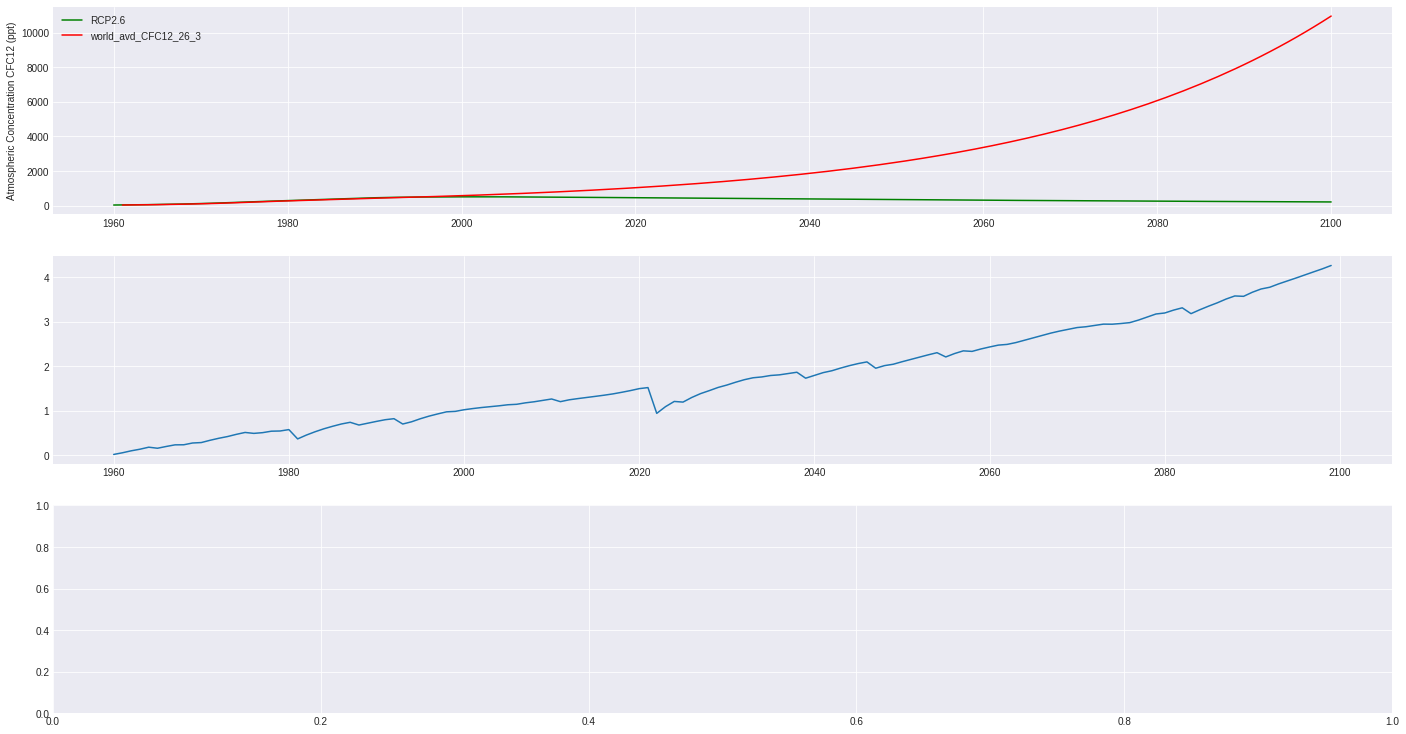

In [152]:
# now just plotting CFC12 concentrations, stratospheric ozone and temperature changes
# now need to generate comparisons  against world projected

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(years_4_array,c26_cfc_range[:,16] , color='green', label='RCP2.6') # plotting the emissions year on the y-axis against the equivalent emissions for CFC12 gases for RCP2.6 (x-axis)
ax1.plot(years_4_array[1:],cfc12_26_world_avd,color='red',label='world_avd_CFC12_26_3')
ax1.set_ylabel('Atmospheric Concentration CFC12 (ppt)')
#ax1.title("RCP2.6 CFC12 atmospheric concentrations, ppt")
ax1.legend();

# ax2 and ax3 use calcualtions from a completely hypothetical multi-gas scenario above

ax2.plot(np.arange(1960,2100),T)
